In [1]:
## Company Financial Performance & Valuation Analysis

# This project analyzes the operational performance and market valuation of selected publicly traded companies. 
# Operational efficiency is evaluated using gross and operating margins, while valuation is assessed using P/E and P/B ratios.
# Companies are classified into performance and valuation categories to understand how market pricing aligns with fundamentals.

In [2]:
import pandas as pd

In [3]:
df_margin = pd.read_excel('Profit margin analysis.xlsx')
df_ratio = pd.read_excel('Ratio Analysis.xlsx')
#for the gross and operating margin
df_margin

,Year,Company,Gross margin,Operating Margin
0,2022,AAPL,0.433096,0.331047
1,2021,AAPL,0.417794,0.328670
2,2020,AAPL,0.382332,0.281748
3,2019,AAPL,0.378178,0.293946
4,2018,AAPL,0.383437,0.307991
...,...,...,...,...
156,2013,AMZN,0.272269,0.053699
157,2012,AMZN,0.247524,0.046405
158,2011,AMZN,0.224411,0.040456
159,2010,AMZN,0.223453,0.057713


In [4]:
#for the price to earning ratio and price to book ratio
df_ratio

,Year,Company,Price to earning ratio,Price to book ratio
0,2022,AAPL,0.020710,0.040791
1,2021,AAPL,0.030770,0.046177
2,2020,AAPL,0.039295,0.034527
3,2019,AAPL,0.023613,0.014419
4,2018,AAPL,0.012574,0.006986
...,...,...,...,...
156,2013,AMZN,0.666204,0.018730
157,2012,AMZN,-2.913590,0.013871
158,2011,AMZN,0.124754,0.010148
159,2010,AMZN,0.070130,0.011770


In [5]:
#merging the two datasets
df_total=pd.merge(df_margin,df_ratio,on=['Company ','Year'],how='inner')
df_total

,Year,Company,Gross margin,Operating Margin,Price to earning ratio,Price to book ratio
0,2022,AAPL,0.433096,0.331047,0.020710,0.040791
1,2021,AAPL,0.417794,0.328670,0.030770,0.046177
2,2020,AAPL,0.382332,0.281748,0.039295,0.034527
3,2019,AAPL,0.378178,0.293946,0.023613,0.014419
4,2018,AAPL,0.383437,0.307991,0.012574,0.006986
...,...,...,...,...,...,...
156,2013,AMZN,0.272269,0.053699,0.666204,0.018730
157,2012,AMZN,0.247524,0.046405,-2.913590,0.013871
158,2011,AMZN,0.224411,0.040456,0.124754,0.010148
159,2010,AMZN,0.223453,0.057713,0.070130,0.011770


In [6]:
df_total.columns

Index(['Year', 'Company ', 'Gross margin', 'Operating Margin ',
       'Price to earning ratio', 'Price to book ratio'],
      dtype='object')

In [7]:
#stripping extra spaces for convenience
df_total.columns = df_total.columns.str.strip()
df_total.columns

Index(['Year', 'Company', 'Gross margin', 'Operating Margin',
       'Price to earning ratio', 'Price to book ratio'],
      dtype='object')

In [8]:
#renaming the columns
df_total.rename(columns={'Gross margin':'Gross_margin','Operating Margin':'Operating_Margin','Price to earning ratio':'PE_ratio', 'Price to book ratio':'PB_ratio'},inplace='true')
df_total.columns

Index(['Year', 'Company', 'Gross_margin', 'Operating_Margin', 'PE_ratio',
       'PB_ratio'],
      dtype='object')

In [9]:
#cleaning the company names
df_total['Company']=df_total['Company'].str.strip()

In [10]:
#confirming data types
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              161 non-null    int64  
 1   Company           161 non-null    object 
 2   Gross_margin      161 non-null    float64
 3   Operating_Margin  161 non-null    float64
 4   PE_ratio          161 non-null    float64
 5   PB_ratio          161 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


In [11]:
#checking for missing values
df_total.isnull().sum()

Year                0
Company             0
Gross_margin        0
Operating_Margin    0
PE_ratio            0
PB_ratio            0
dtype: int64

In [12]:
#checking the range of values
df_total.describe()

,Year,Gross_margin,Operating_Margin,PE_ratio,PB_ratio
count,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2015.608696,0.530836,0.243641,-0.033008,0.004570
std,4.049960,0.216793,0.169197,0.523985,0.012246
min,2009.000000,0.099987,-0.400490,-5.810000,-0.062247
25%,2012.000000,0.384699,0.124536,0.009755,0.000871
50%,2016.000000,0.541715,0.285723,0.020308,0.003387
75%,2019.000000,0.644726,0.365645,0.033419,0.006842
max,2023.000000,1.000000,0.526381,0.666204,0.046177


In [13]:
#cleaning the dataset so that we only the profitable companies are used for valuation analysis
df_clean=df_total[(df_total['PE_ratio']>0) & (df_total['PB_ratio']>0)]
df_clean.describe()


,Year,Gross_margin,Operating_Margin,PE_ratio,PB_ratio
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2015.441860,0.548357,0.272474,0.042632,0.007187
std,4.141835,0.193883,0.133283,0.079809,0.008956
min,2009.000000,0.181134,0.000020,0.002224,0.000069
25%,2012.000000,0.395678,0.208726,0.014236,0.001789
50%,2015.000000,0.560083,0.300892,0.022501,0.004235
75%,2019.000000,0.644726,0.365645,0.035160,0.008440
max,2023.000000,1.000000,0.493484,0.666204,0.046177


In [14]:
#performance analysis
performance_df=(df_total.groupby('Company')[['Gross_margin','Operating_Margin']].mean().reset_index())
performance_df

,Company,Gross_margin,Operating_Margin
0,AAPL,0.397978,0.320243
1,AIG,0.236702,0.233025
2,AMZN,0.329043,0.084116
3,BCS,1.000000,0.000029
4,GOOG,0.597709,0.335488
5,INTC,0.592506,0.402062
6,MCD,0.447209,0.416824
7,MSFT,0.702919,0.420098
8,NVDA,0.537037,0.230825
9,PCG,0.693721,0.181288


In [15]:
#Highest Gross Margin
performance_df.sort_values(by='Gross_margin',ascending=False).head(10)

,Company,Gross_margin,Operating_Margin
3,BCS,1.000000,0.000029
7,MSFT,0.702919,0.420098
9,PCG,0.693721,0.181288
4,GOOG,0.597709,0.335488
5,INTC,0.592506,0.402062
8,NVDA,0.537037,0.230825
10,PYPL,0.474771,0.210379
6,MCD,0.447209,0.416824
0,AAPL,0.397978,0.320243
2,AMZN,0.329043,0.084116


In [16]:
#Highest Operating Margin
performance_df.sort_values(by='Operating_Margin',ascending=False).head(10)

,Company,Gross_margin,Operating_Margin
7,MSFT,0.702919,0.420098
6,MCD,0.447209,0.416824
5,INTC,0.592506,0.402062
4,GOOG,0.597709,0.335488
0,AAPL,0.397978,0.320243
1,AIG,0.236702,0.233025
8,NVDA,0.537037,0.230825
10,PYPL,0.474771,0.210379
9,PCG,0.693721,0.181288
2,AMZN,0.329043,0.084116


In [17]:
#Weak / Loss-Making Companies
performance_df.sort_values(by='Operating_Margin').head(5)

,Company,Gross_margin,Operating_Margin
11,SHLDQ,0.246416,-0.005414
3,BCS,1.000000,0.000029
2,AMZN,0.329043,0.084116
9,PCG,0.693721,0.181288
10,PYPL,0.474771,0.210379


In [18]:
#performance classification
performance_df['Performance_Category'] = performance_df['Operating_Margin'].apply(
    lambda x: 'Strong' if x > 0.25 else 'Moderate' if x > 0 else 'Weak')
performance_df

,Company,Gross_margin,Operating_Margin,Performance_Category
0,AAPL,0.397978,0.320243,Strong
1,AIG,0.236702,0.233025,Moderate
2,AMZN,0.329043,0.084116,Moderate
3,BCS,1.000000,0.000029,Moderate
4,GOOG,0.597709,0.335488,Strong
5,INTC,0.592506,0.402062,Strong
6,MCD,0.447209,0.416824,Strong
7,MSFT,0.702919,0.420098,Strong
8,NVDA,0.537037,0.230825,Moderate
9,PCG,0.693721,0.181288,Moderate


In [19]:
# Operational Performance Insights

# Strong Performers

# -MSFT, MCD, and INTC demonstrate the strongest operational efficiency, with operating margins above 40%, indicating excellent cost control and scalable business models.   
# -GOOG and AAPL also fall into the strong performance category, combining healthy gross margins with consistently high operating margins, reflecting strong pricing power and operational discipline.
# -Overall, strong performers show a clear ability to convert revenue into operating profit, highlighting efficient cost structures.

# Moderate Performers

# -AMZN exhibits a relatively healthy gross margin but a significantly lower operating margin, suggesting high operating costs and reinvestment intensity.
# -NVDA, PCG, and PYPL maintain solid gross margins but moderate operating margins, indicating room for operational improvement or higher cost structures.
# -AIG and BCS fall into the moderate category, with BCS showing an unusually high gross margin but near-zero operating margin, which points to inefficiencies beyond direct costs.

# Weak Performers

# -SHLDQ is the only weak performer, with a negative operating margin, indicating persistent operational losses and financial stress.
# -Despite a reasonable gross margin, the negative operating margin suggests that overhead and operating expenses significantly outweigh revenue generation.

In [20]:
# Overall Interpretation

# -High gross margins do not automatically translate into strong operating performance, as seen in companies like BCS and AMZN.
# -Companies classified as strong performers consistently demonstrate effective cost management and scalable operations.
# -Operating margin proves to be a more reliable indicator of operational health than gross margin alone.

In [21]:
#the dataset I'll be using for the valuation analysis
df_clean

,Year,Company,Gross_margin,Operating_Margin,PE_ratio,PB_ratio
0,2022,AAPL,0.433096,0.331047,0.020710,0.040791
1,2021,AAPL,0.417794,0.328670,0.030770,0.046177
2,2020,AAPL,0.382332,0.281748,0.039295,0.034527
3,2019,AAPL,0.378178,0.293946,0.023613,0.014419
4,2018,AAPL,0.383437,0.307991,0.012574,0.006986
...,...,...,...,...,...,...
154,2015,AMZN,0.330402,0.079566,0.531594,0.023672
156,2013,AMZN,0.272269,0.053699,0.666204,0.018730
158,2011,AMZN,0.224411,0.040456,0.124754,0.010148
159,2010,AMZN,0.223453,0.057713,0.070130,0.011770


In [22]:
df_clean.shape

(129, 6)

In [23]:
#the mean of PE and PB ratios
df_valuation=(df_clean.groupby('Company')[['PE_ratio', 'PB_ratio']].mean().reset_index())
df_valuation

,Company,PE_ratio,PB_ratio
0,AAPL,0.019300,0.013597
1,AIG,0.010871,0.000646
2,AMZN,0.188418,0.015961
3,BCS,0.015838,0.000434
4,GOOG,0.027887,0.004489
5,INTC,0.013455,0.002449
6,MCD,0.019111,0.007665
7,MSFT,0.025781,0.008201
8,NVDA,0.068662,0.015478
9,PCG,0.020446,0.001485


In [24]:
#Top 5 expensive companies
df_valuation.sort_values(by='PE_ratio', ascending=False).head(5)

,Company,PE_ratio,PB_ratio
2,AMZN,0.188418,0.015961
11,SHLDQ,0.076634,0.000730
8,NVDA,0.068662,0.015478
10,PYPL,0.052694,0.006561
4,GOOG,0.027887,0.004489


In [25]:
#Least 5 expensive companies
df_valuation.sort_values(by='PE_ratio').head(5)

,Company,PE_ratio,PB_ratio
1,AIG,0.010871,0.000646
5,INTC,0.013455,0.002449
3,BCS,0.015838,0.000434
6,MCD,0.019111,0.007665
0,AAPL,0.019300,0.013597


In [26]:
#Top 5 Companies which are relatively expensive on assets
df_valuation.sort_values(by='PB_ratio',ascending=False).head(5)

,Company,PE_ratio,PB_ratio
2,AMZN,0.188418,0.015961
8,NVDA,0.068662,0.015478
0,AAPL,0.019300,0.013597
7,MSFT,0.025781,0.008201
6,MCD,0.019111,0.007665


In [27]:
#Top 5 Companies which are relatively cheaper on assets
df_valuation.sort_values(by='PB_ratio').head(5)

,Company,PE_ratio,PB_ratio
3,BCS,0.015838,0.000434
1,AIG,0.010871,0.000646
11,SHLDQ,0.076634,0.000730
9,PCG,0.020446,0.001485
5,INTC,0.013455,0.002449


In [28]:
#adding the valuation category
pe_q1 = df_valuation['PE_ratio'].quantile(0.25)
pe_q3 = df_valuation['PE_ratio'].quantile(0.75)
pb_q1 = df_valuation['PB_ratio'].quantile(0.25)
pb_q3 = df_valuation['PB_ratio'].quantile(0.75)

df_valuation['PE_Valuation_Category'] = df_valuation['PE_ratio'].apply(
    lambda x: 'High PE' if x > pe_q3 else 'Low PE' if x < pe_q1 else 'Mid PE')
df_valuation['PB_Valuation_Category'] = df_valuation['PB_ratio'].apply(
    lambda x: 'High PB' if x > pb_q3 else 'Low PB' if x < pb_q1 else 'Mid PB')
df_valuation


,Company,PE_ratio,PB_ratio,PE_Valuation_Category,PB_Valuation_Category
0,AAPL,0.019300,0.013597,Mid PE,High PB
1,AIG,0.010871,0.000646,Low PE,Low PB
2,AMZN,0.188418,0.015961,High PE,High PB
3,BCS,0.015838,0.000434,Low PE,Low PB
4,GOOG,0.027887,0.004489,Mid PE,Mid PB
5,INTC,0.013455,0.002449,Low PE,Mid PB
6,MCD,0.019111,0.007665,Mid PE,Mid PB
7,MSFT,0.025781,0.008201,Mid PE,Mid PB
8,NVDA,0.068662,0.015478,High PE,High PB
9,PCG,0.020446,0.001485,Mid PE,Mid PB


In [29]:
# # Valuation Insights

# High P/E and High P/B (Growth-Priced Companies)
# -AMZN and NVDA fall into the high P/E and high P/B category, indicating strong market confidence and significant growth expectations priced into both earnings and asset values.
# -These companies are valued primarily on anticipated future performance rather than current fundamentals, implying higher valuation risk if growth expectations are not met.

# Mid P/E with High P/B (Asset-Premium Valuation)
# -AAPL shows a mid-range P/E but high P/B ratio, suggesting stable earnings valuation combined with a strong premium on its asset base and brand value.
# -This reflects investor confidence in long-term value creation beyond short-term earnings growth.

# Low P/E and Low P/B (Conservatively Valued or Distressed)
# -AIG and BCS exhibit both low P/E and low P/B ratios, indicating conservative market sentiment and limited growth expectations.\
# -These valuations may reflect structural challenges, sector-specific risks, or balance-sheet concerns rather than temporary mispricing.

# Low P/E with Mid P/B (Selective Undervaluation)
# -INTC appears undervalued on an earnings basis while maintaining a moderate book-value valuation, suggesting cautious market expectations despite a relatively solid asset base.
# -This combination may indicate potential valuation upside if operational performance improves.

# Mid P/E and Mid P/B (Fairly Valued Companies)
# -GOOG, MCD, MSFT, PCG, and PYPL cluster in the mid-valuation range for both P/E and P/B.
# -These companies are priced in line with their current earnings and asset strength, reflecting balanced market expectations and stable business models.

# High P/E with Low P/B (Earnings Volatility Risk)
# -SHLDQ displays a high P/E but low P/B ratio, indicating valuation driven by volatile or irregular earnings rather than balance-sheet strength.
# -This pattern often reflects financial stress or accounting effects rather than sustainable growth.

In [30]:
#Overall Interpretation
# - There is variation in valuation across companies based on average P/E and P/B ratios.
# - Some companies like AMZN and NVDA consistently appear expensive across both P/E and P/B metrics, indicating strong market expectations.
# - Firms like AIG,BCS and INTC show relatively low valuation ratios, which may reflect lower growth expectations or potential undervaluation.
# - P/E and P/B rankings are not always aligned, suggesting differences in earnings performance versus balance-sheet strength.

In [31]:
#Final dataset
final_summary = pd.merge(performance_df,df_valuation,on='Company',how='inner')
final_summary

,Company,Gross_margin,Operating_Margin,Performance_Category,PE_ratio,PB_ratio,PE_Valuation_Category,PB_Valuation_Category
0,AAPL,0.397978,0.320243,Strong,0.019300,0.013597,Mid PE,High PB
1,AIG,0.236702,0.233025,Moderate,0.010871,0.000646,Low PE,Low PB
2,AMZN,0.329043,0.084116,Moderate,0.188418,0.015961,High PE,High PB
3,BCS,1.000000,0.000029,Moderate,0.015838,0.000434,Low PE,Low PB
4,GOOG,0.597709,0.335488,Strong,0.027887,0.004489,Mid PE,Mid PB
5,INTC,0.592506,0.402062,Strong,0.013455,0.002449,Low PE,Mid PB
6,MCD,0.447209,0.416824,Strong,0.019111,0.007665,Mid PE,Mid PB
7,MSFT,0.702919,0.420098,Strong,0.025781,0.008201,Mid PE,Mid PB
8,NVDA,0.537037,0.230825,Moderate,0.068662,0.015478,High PE,High PB
9,PCG,0.693721,0.181288,Moderate,0.020446,0.001485,Mid PE,Mid PB


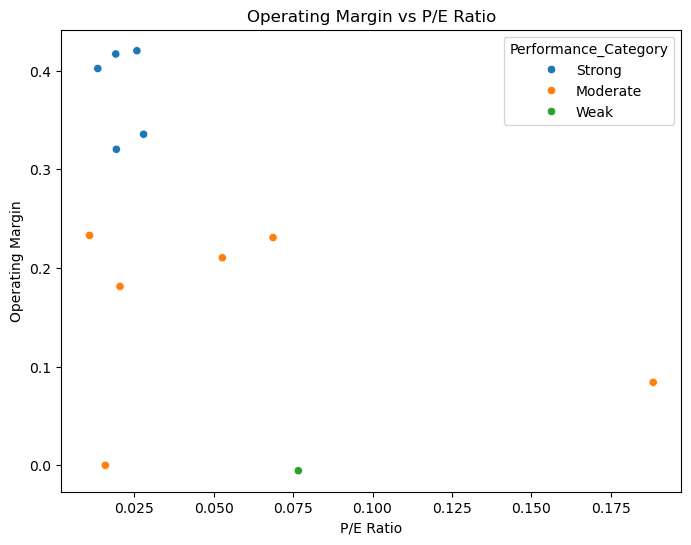

In [32]:
#Performance vs Valuation Scatter
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=final_summary,x='PE_ratio',y='Operating_Margin',hue='Performance_Category')

plt.title('Operating Margin vs P/E Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('Operating Margin')
plt.show()

In [33]:
# #Scatter plot insights
# 1)Top-Right (High Margin, High P/E)

# -Strong profitability

# -High market valuation
# -Example: dominant tech firms
# -Interpretation: premium, growth-priced companies

# ️2)Top-Left (High Margin, Low P/E)

# -Strong profitability
# -Relatively cheap valuation
# -Interpretation: potential undervaluation

# 3️)Bottom-Right (Low Margin, High P/E)

# -Weak current profitability
# -High valuation
# -Interpretation: growth expectations, higher risk
# -Investors are betting on future performance.

# ️4) Bottom-Left (Low Margin, Low P/E)

# -Weak profitability
# -Low valuation
# -Interpretation: financial distress or low expectations

In [34]:
# Key Takeaways
# - Strong operational performance generally supports higher valuation, but valuation premiums vary by growth expectations.
# - Several moderate performers command high valuation multiples, indicating growth-driven pricing rather than current profitability.
# - Weak operational performance is consistently associated with low valuation, highlighting market sensitivity to financial distress.
# - Combining performance and valuation metrics provides deeper insight than analyzing either in isolation.

In [35]:
# Conclusion
# This project demonstrates how operational performance and market valuation interact across companies.
# By separating absolute performance metrics from relative valuation measures, the analysis highlights
# cases where market pricing aligns with fundamentals and where it diverges.
# Such integrated analysis supports more informed financial decision-making.
